# Looking at Factors Affecting Housing Prices and Creating a Model That Predicts Prices Based on the Various Factors

## 1. Defining the Question

### a) Specifying the Question

What are the main factors that affect housing prices?

### b) Defining the Metric for Success

To create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. We are looking to achieve an accuracy score of at least 80%.

### c) Understanding the context 

We are working for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#Loading the required libraries
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset
#
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

There are 21613 records and 20 variables in our dataset

In [4]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All variables have the correct data type

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [7]:
#Dropping colums
df.drop(columns=['id', 'long', 'lat', 'yr_renovated'], axis = 1, inplace = True)

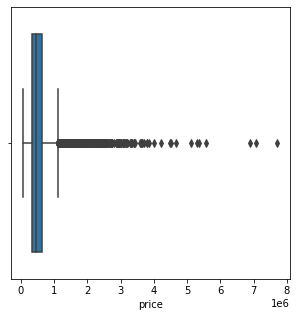

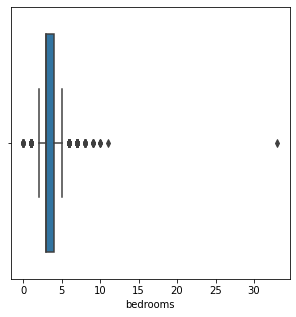

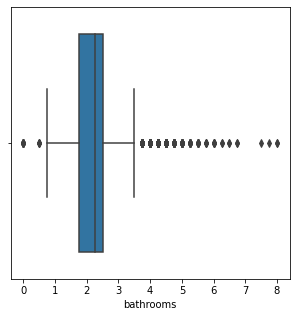

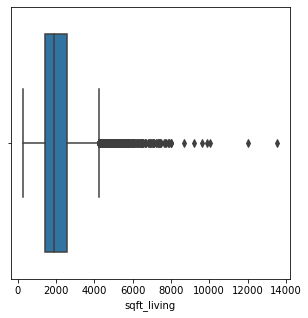

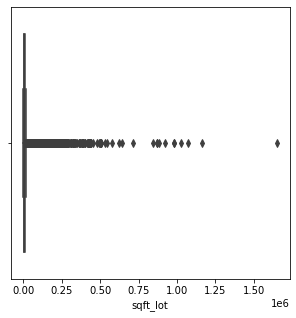

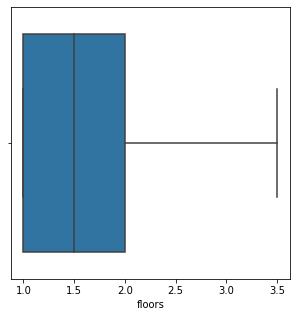

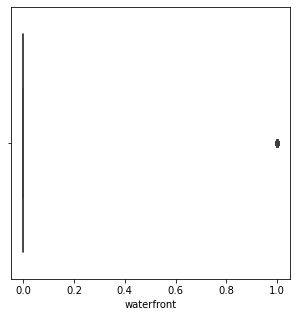

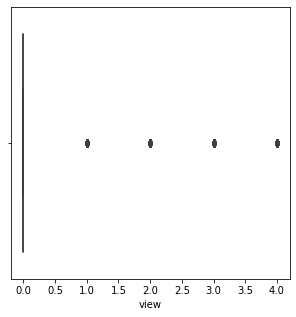

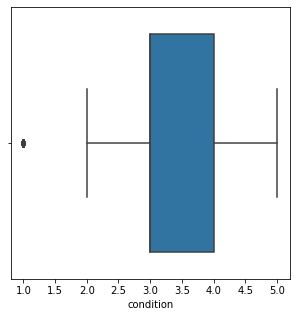

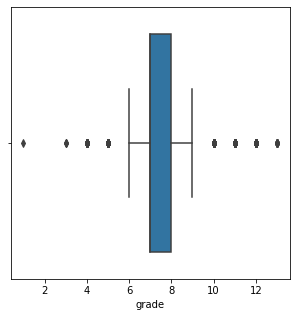

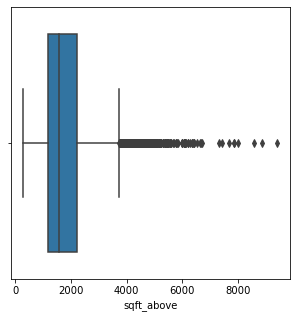

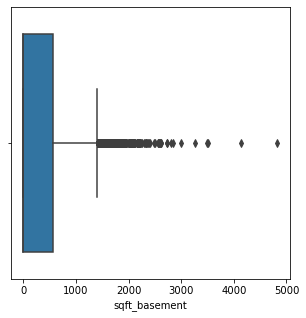

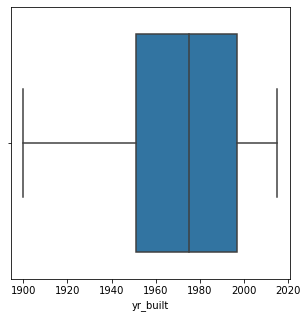

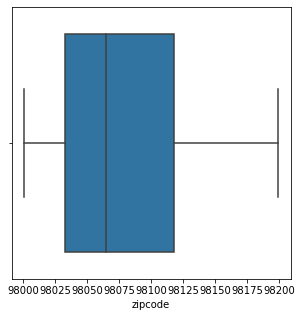

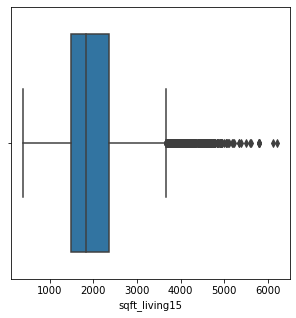

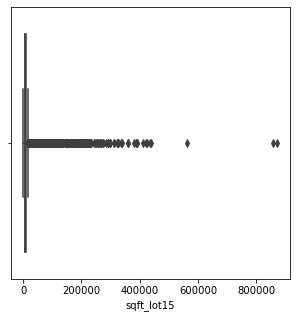

In [8]:
# Checking for Outliers
#
cols = df.columns

for i in cols:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(df[i])
        
plt.show()

We do not drop outliers as they are true values.

In [9]:
# Checking for Anomalies
for i in cols:
    u = df[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  price is [221900. 538000. 180000. ... 541800. 610685. 402101.]
Unique values of  bedrooms is [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
Unique values of  bathrooms is [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
Unique values of  sqft_living is [1180 2570  770 ... 3087 3118 1425]
Unique values of  sqft_lot is [ 5650  7242 10000 ...  5813  2388  1076]
Unique values of  floors is [1.  2.  1.5 3.  2.5 3.5]
Unique values of  waterfront is [0 1]
Unique values of  view is [0 3 4 2 1]
Unique values of  condition is [3 5 4 1 2]
Unique values of  grade is [ 7  6  8 11  9  5 10 12  4  3 13  1]
Unique values of  sqft_above is [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 242

We realize there is a house that has 33 bedrooms, we will explore it to see if it is correct.

In [10]:
df.loc[df['bedrooms'] > 9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,98106,1420,4960
13314,1150000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,98004,2730,10400
15161,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,98006,2040,11914
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,98103,1330,4700
19254,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,98105,1810,3745


We can see that the 33 bedroom house is relatively smaller than the other big sized houses. Its price is also similar to 10-bedroom houses.

In [11]:
df.drop(labels=[15870], axis=0, inplace=True)

We drop that row as it is an anomaly.

In [12]:
# Identifying the Missing Data
#
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset.

In [13]:
# Dealing with the Missing Data
#
df.duplicated().sum()

6

In [14]:
#Dealing with duplicated values
df.drop_duplicates(inplace = True)

In [15]:
#Confirming duplicates are dropped
df.duplicated().sum()

0

In [16]:
# Looking at the shape of our dataset
#
df.shape

(21606, 16)

In [17]:
#Exporting our cleaned dataset
house = df.copy()

## 6. Exploratory Analysis

### 6.1  Univariate Analysis

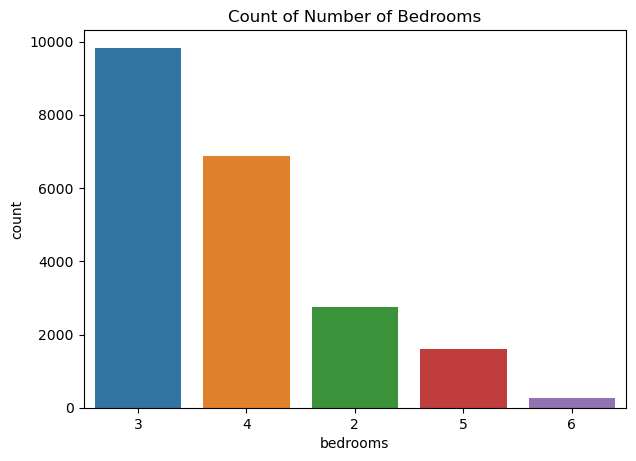

In [18]:
#Plotting the number of Bedrooms
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(house['bedrooms'], order=house['bedrooms'].value_counts().index[:5])
plt.title("Count of Number of Bedrooms")
plt.show()

Most houses had three bedrooms

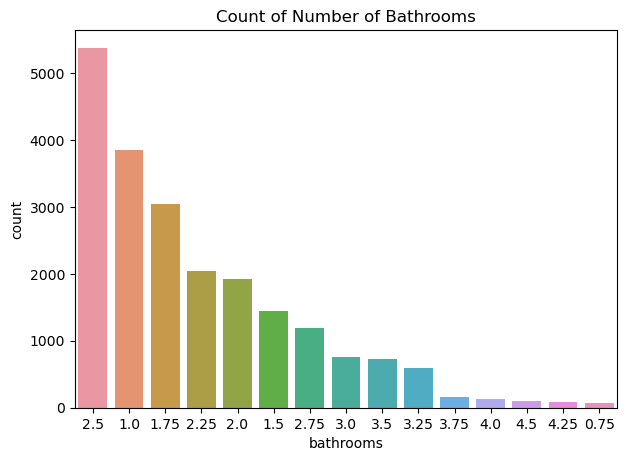

In [19]:
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(house['bathrooms'], order=house['bathrooms'].value_counts().index[:15])
plt.title("Count of Number of Bathrooms")
plt.show()

Most houses have 2.5 bathrooms followed by 1 bathroom

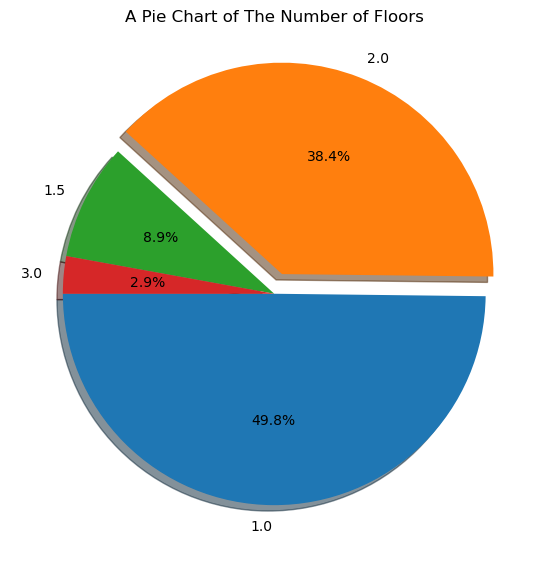

In [20]:
accounts = house['floors'].value_counts().head(4)
labels = accounts.index
values = accounts.values

plt.figure(figsize=(7,7), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1,0,0), shadow=True, startangle=180)
plt.title('A Pie Chart of The Number of Floors', color='black')
plt.show()

Most houses had one floor.

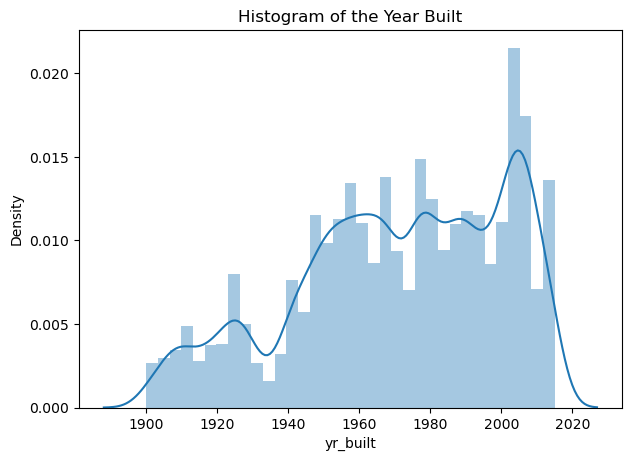

In [21]:
# Histogram of the year when the houses are built
plt.figure(dpi = 100, figsize = (7,5))
sns.distplot(house['yr_built'])
plt.title("Histogram of the Year Built")
plt.show()

Most houses were built between 2000 and 2010

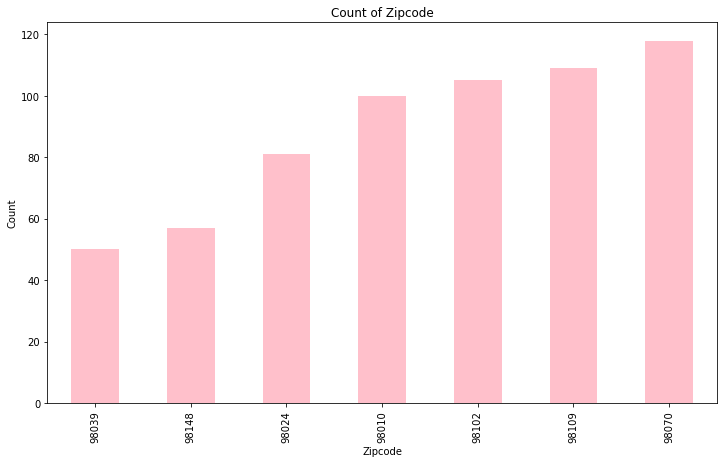

In [22]:
plt.figure(figsize = (12,7))
house.groupby('zipcode').size().sort_values(ascending = True)[:7].plot(kind='bar', color='pink')
plt.title('Count of Zipcode')
plt.ylabel('Count')
plt.xlabel('Zipcode')
plt.show()

The most popular zipcode where houses are is 98188

In [23]:
#A table for the prices, showing the top most expensive houses
house['price'].sort_values(ascending=False)[:5]

7252    7700000.0
3914    7060000.0
9254    6890000.0
4411    5570000.0
1448    5350000.0
Name: price, dtype: float64

The most costly house is 7700000

In [24]:
#Showing the least expensive houses
house['price'].sort_values(ascending=True)[:5]

1149     75000.0
15293    78000.0
465      80000.0
16198    81000.0
8274     82000.0
Name: price, dtype: float64

The cheapest house is 75000

In [25]:
#finding the mean of the columns
house[cols].mean()

price            540196.137554
bedrooms              3.369481
bathrooms             2.114737
sqft_living        2079.976071
sqft_lot          15110.609877
floors                1.494145
waterfront            0.007544
view                  0.234240
condition             3.409423
grade                 7.656669
sqft_above         1788.431824
sqft_basement       291.544247
yr_built           1970.999028
zipcode           98077.940156
sqft_living15      1986.622188
sqft_lot15        12770.945524
dtype: float64

In [26]:
#Finding the mode of the numerical columns
house[cols].mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,98103.0,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The price is bimodal

In [27]:
#Median of the columns
house[cols].median()

price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7620.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
zipcode           98065.00
sqft_living15      1840.00
sqft_lot15         7620.00
dtype: float64

In [28]:
#Finding the quantiles of the numerical values
house[cols].quantile([0.25, 0.75])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0.25,321612.5,3.0,1.75,1427.75,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,98033.0,1490.0,5100.00
0.75,645000.0,4.0,2.50,2550.00,10693.5,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,98118.0,2360.0,10083.75


In [29]:
#Standard deviation of the columns
house[cols].std()

price            367413.962051
bedrooms              0.907972
bathrooms             0.770266
sqft_living         918.542783
sqft_lot          41426.699961
floors                0.539914
waterfront            0.086531
view                  0.766201
condition             0.650716
grade                 1.175527
sqft_above          828.159764
sqft_basement       442.624251
yr_built             29.370912
zipcode              53.508747
sqft_living15       685.437467
sqft_lot15        27308.130524
dtype: float64

There is a high standard deviation in most of our data.

In [30]:
#Variance of our columns
house[cols].var().apply(lambda x: '%.5f' % x)

price            134993019510.37105
bedrooms                    0.82441
bathrooms                   0.59331
sqft_living            843720.84363
sqft_lot           1716171469.62131
floors                      0.29151
waterfront                  0.00749
view                        0.58706
condition                   0.42343
grade                       1.38186
sqft_above             685848.59389
sqft_basement          195916.22787
yr_built                  862.65045
zipcode                  2863.18600
sqft_living15          469824.52113
sqft_lot15          745733992.70331
dtype: object

There is a high variance in most of our data.

In [31]:
#Kurtosis of the columns
house[cols].kurt()

price             34.512840
bedrooms           1.839794
bathrooms          1.279054
sqft_living        5.241533
sqft_lot         284.994434
floors            -0.484773
waterfront       127.589551
view              10.899256
condition          0.525806
grade              1.191607
sqft_above         3.401793
sqft_basement      2.714339
yr_built          -0.657077
zipcode           -0.853602
sqft_living15      1.596679
sqft_lot15       150.720476
dtype: float64

There is presence of extreme values in price, sqft_lot, waterfront, view, and sqft_lot15

In [32]:
#Skewness of the numerical columns
house[cols].skew()

price             4.021231
bedrooms          0.518481
bathrooms         0.511142
sqft_living       1.471376
sqft_lot         13.058141
floors            0.616385
waterfront       11.383222
view              3.396481
condition         1.032642
grade             0.771536
sqft_above        1.446745
sqft_basement     1.577751
yr_built         -0.469882
zipcode           0.405806
sqft_living15     1.108154
sqft_lot15        9.505436
dtype: float64

Most of our data is positively skewed apart from the year built.

### 6.2 Bivariate Analysis

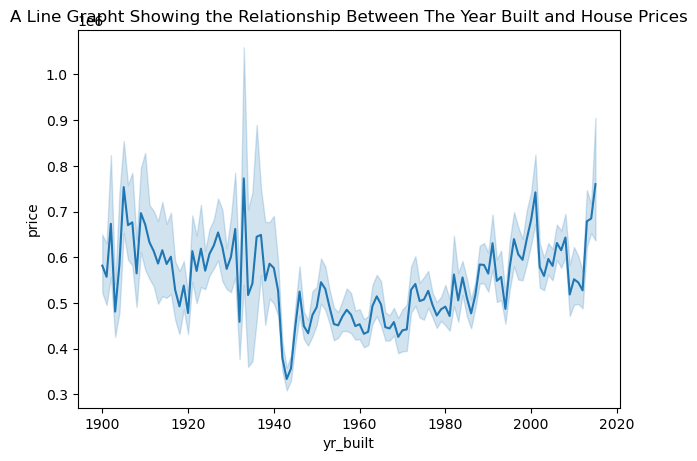

In [33]:
#Line graph showing relationship between price and year built
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(data=house, x="yr_built", y="price")
plt.title("A Line Grapht Showing the Relationship Between The Year Built and House Prices")
plt.show()

Houses built between 1940 and 1960 have the lowest prices with those built around 1900, 1930, 2000, and 2018 costing the most

<Figure size 2000x2000 with 0 Axes>

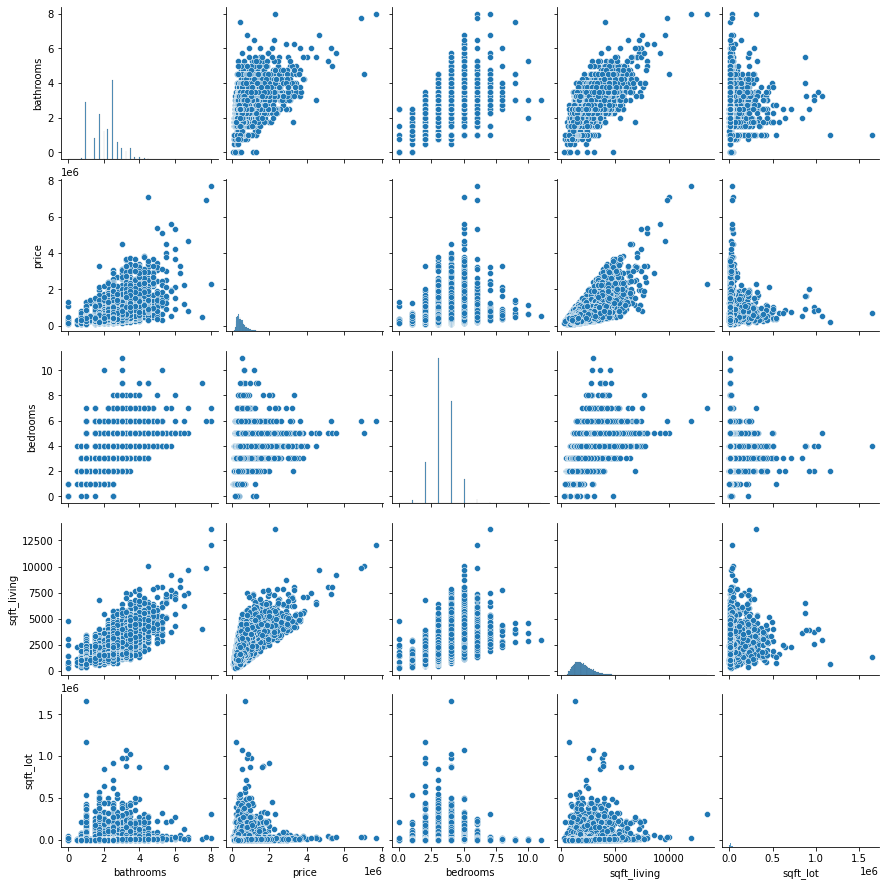

In [34]:
#Pairplot showing the relationship between the various colums
plt.figure(figsize = (20, 20), dpi=100)
y =['bathrooms', 'price', 'bedrooms', 'sqft_living', 'sqft_lot']
sns.pairplot(house[y])

Number of bathrooms and sqft_living have a linear relationship with most of the other columns.

<AxesSubplot:>

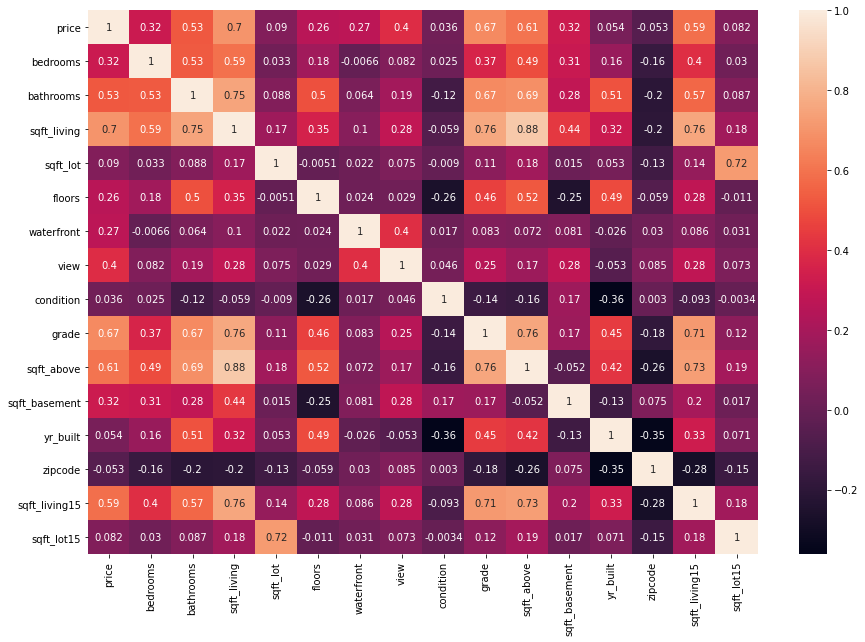

In [36]:
#Correlation
correlation = house[cols].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, annot=True)

There is a high correlation between some of the columns.

<AxesSubplot:>

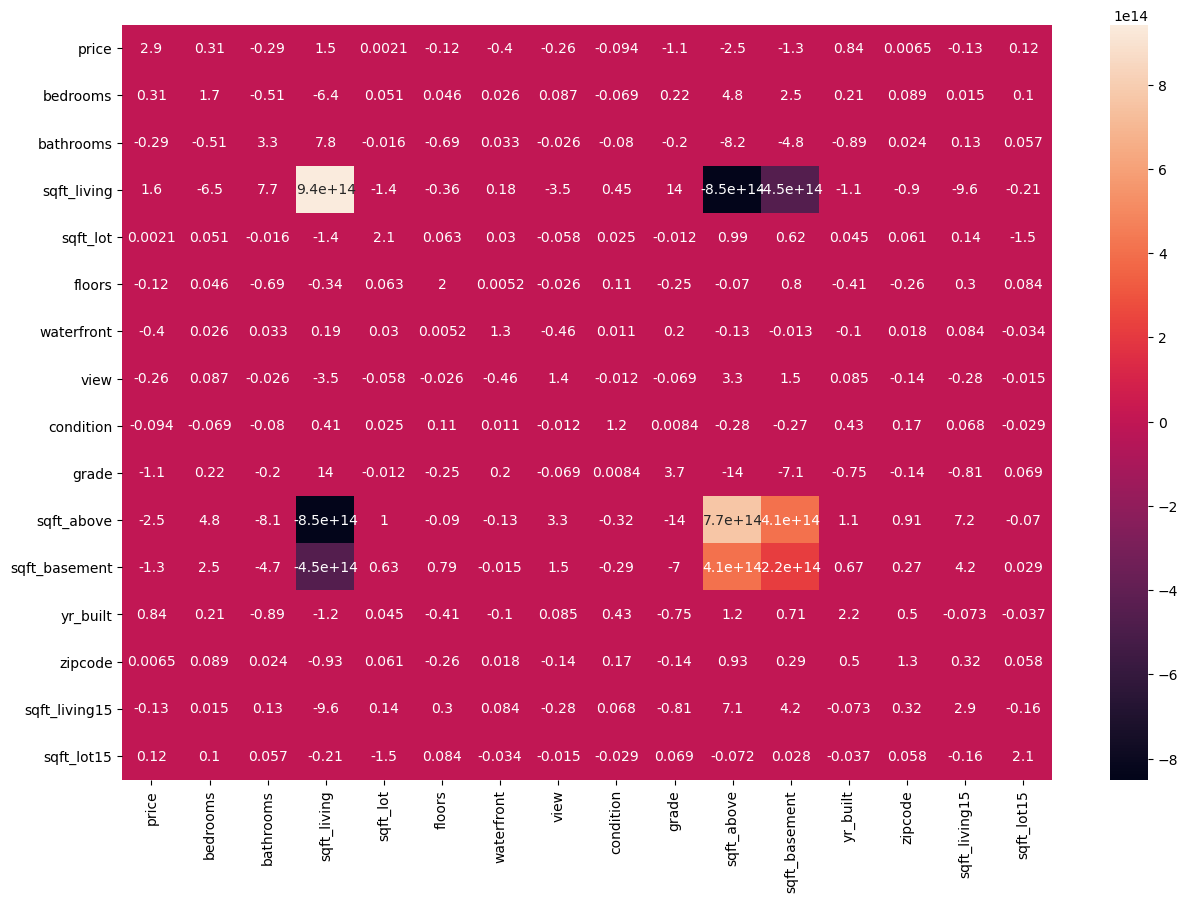

In [37]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (15,10))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

## 7. Implementing the Solution

### 7.1 Feature Selection and Engineering

In [38]:
#Importing the LDA Library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
# Implementing the Solution
# We first start with feature selection using LDA
X = house.drop(['price'], axis = 1)
y = house['price']

In [40]:
#Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,y)
lda_feat = X_lda.transform(X)
#Display the coefficients of the reducted colums
X_lda.coef_

array([[1.35906277e+02, 9.75038036e+01, 5.55197870e-02, ...,
        4.88046181e+01, 6.62154949e-01, 4.56748550e-03],
       [1.37765950e+02, 1.01381895e+02, 5.34490216e-02, ...,
        4.88734293e+01, 6.64919491e-01, 4.52775295e-03],
       [1.35700639e+02, 1.01895529e+02, 5.39359673e-02, ...,
        4.87877262e+01, 6.62538046e-01, 4.52337194e-03],
       ...,
       [1.34448811e+02, 1.13283929e+02, 7.13094840e-02, ...,
        4.88722000e+01, 6.59027431e-01, 4.51552038e-03],
       [1.33126324e+02, 1.00406614e+02, 7.66360536e-02, ...,
        4.88291003e+01, 6.58389939e-01, 4.47914119e-03],
       [1.31579769e+02, 1.12339137e+02, 7.95458341e-02, ...,
        4.88759143e+01, 6.55367611e-01, 4.45449780e-03]])

In [41]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
condition,261.906236
bedrooms,135.906277
bathrooms,97.503804
zipcode,48.804618
yr_built,20.491195
grade,8.294308
sqft_living15,0.662155
sqft_above,0.228017
sqft_living,0.055520
sqft_lot15,0.004567


In [42]:
#We will use only the positive features in our model
X = X[['condition', 'bedrooms', 'bathrooms', 'zipcode', 'yr_built', 'grade', 'sqft_living15', 'sqft_above','sqft_living','sqft_lot15','sqft_lot']]

### 7.2 Multiple Regression Analysis

In [43]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
#Creating and fitting our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#Making predictions using our model
y_pred = model.predict(X_test)

In [46]:
#Findinf the root mean squared error and the score of our model
from sklearn import metrics
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of the model is: ", model.score(X_test, y_test))

Root mean squared error:  216674.57785598424
The score of the model is:  0.6408971083816353


In [47]:
#Looking at the outcome of the predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
16320,299000.0,357020.840214
10704,375000.0,630519.130258
17046,450000.0,460301.884599
20058,325000.0,217601.686955
3225,875000.0,834348.549664
...,...,...
13493,852500.0,887301.927875
18286,556000.0,490315.295301
16121,240000.0,485730.365382
18331,560000.0,603717.137061


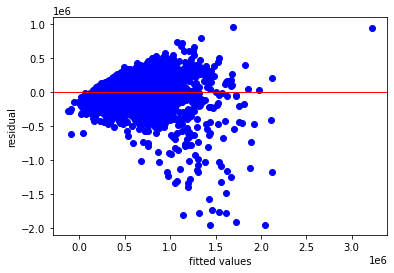

In [48]:
#Plotting the residuals
residuals = np.subtract(y_pred, y_test)

plt.scatter(y_pred, residuals, color="blue")
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [49]:
#Using the Barlett's test to check heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
    print('the variances are unequal, and the model should be reassessed')
else:
    print('the variances are homogeneous!')

5.95759051388836e-88
the variances are homogeneous!


The difference between the predicted values with the actual values is steady throughout our data

## 8. Challenging the solution

We will use other models to see if there can be better predictions






### 8.1 Quantile Regression

In [50]:
# Importing necessary libraries for quantile regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [51]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
model_1 = smf.quantreg('y ~ X', house)
res = model_1.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3789
Model:                       QuantReg   Bandwidth:                   2.481e+04
Method:                 Least Squares   Sparsity:                    3.414e+05
Date:                Mon, 14 Feb 2022   No. Observations:                21606
Time:                        14:54:25   Df Residuals:                    21594
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.0859      0.326   -104.412      0.000     -34.726     -33.446
X[0]        1.635e+04   1932.331      8.460      0.000    1.26e+04    2.01e+04
X[1]       -3.165e+04   1652.702    -19.152      0.000   -3.49e+04   -2.84e+04
X[2]        2.674e+04   2628.837     10.172      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [53]:
#Using the upper quanitle 0.75
res = model_1.fit(q=.75)

#Printing the summary
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4372
Model:                       QuantReg   Bandwidth:                   2.286e+04
Method:                 Least Squares   Sparsity:                    4.760e+05
Date:                Mon, 14 Feb 2022   No. Observations:                21606
Time:                        14:54:57   Df Residuals:                    21594
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6338      0.407    -40.845      0.000     -17.432     -15.836
X[0]        1.497e+04   2360.709      6.342      0.000    1.03e+04    1.96e+04
X[1]        -4.31e+04   2139.164    -20.147      0.000   -4.73e+04   -3.89e+04
X[2]        5.017e+04   3248.091     15.447      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


### 8.2 Ridge Regression

In [54]:
#importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
#start building our model and choosing parameters
model_2=Ridge(normalize=True)
search=GridSearchCV(estimator=model_2,param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
#printing the best parameter
print(search.best_params_)

{'alpha': 0.01}


In [56]:
#fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
y_pred=ridge.predict(X)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 51321240452.40477


In [57]:
#Checking the accuracy:
print("Accuracy:",ridge.score(X_test, y_test )* 100)

Accuracy: 64.27643239674636


We obtain an accuracy of 64.27%

### 8.3 Lasso Regression

In [58]:
#importing needed libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [59]:
#Building our model
model_3=Lasso(normalize=True)
search=GridSearchCV(model_3,param_grid={"alpha":np.concatenate((np.arange(0.1,2,0.1),np.arange(2, 5, 0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("lasso best parameters:", search.best_params_)

lasso best parameters: {'alpha': 4.5}


In [60]:
#Using the obtained alpha
lasso_m=Lasso(alpha= 4.5,normalize=True)
lasso_m.fit(X,y)
y_pred=lasso_m.predict(X_test)
print("lasso MSE:", mean_squared_error(y_test,y_pred))

lasso MSE: 46766480607.583176


In [61]:
#Checking the accuracy:
print("Accuracy:",lasso_m.score(X_test, y_test )* 100)

Accuracy: 64.2284571055602


Our lasso model has an accuracy of 64.22%

### 8.4 Elastic Net Regression

In [62]:
#Importing the needed libraries for elastic net regression
from sklearn.linear_model import ElasticNet

In [63]:
#Creating our model
model_4=ElasticNet(normalize=True)
search=GridSearchCV(model_4,param_grid={'alpha':np.logspace(-5,2,8),"l1_ratio":[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [64]:
# Fitting our model and getting best parameters
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print("Elastic net best parameters:", search.best_params_)

Elastic net best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}


In [65]:
#Using our alpha
elastic=ElasticNet(normalize=True,alpha=1e-05, l1_ratio=0.8)
elastic.fit(X,y)
y_pred=elastic.predict(X)
print("Elastic Net MSE:", mean_squared_error(y,y_pred))

Elastic Net MSE: 51570331067.54895


In [66]:
#Checking the accuracy:
print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 64.15155138633742


We get a low accuracy of 64.15%

## 9. Conclusion

Ridge Regression model had the highest score and it is the model that we will settle for. However, all our models had almost the same strength at 64% with slight differences in the decimals.